In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import OrderedDict
from Bio import SeqIO
import glob


In [2]:
fasta_files = glob.glob("/home/luisasantus/Desktop/crg_cluster/data/structural_regression/benchfam/refs/*.fa")

In [3]:
def get_domain(fasta_file):
    fasta_sequences = SeqIO.parse(open(fasta_file),'fasta')
    found_names = []
    domain = "mono"
    fam = os.path.basename(fasta_file).replace(".fa", "")
    for fasta in fasta_sequences:
        name, sequence = fasta.id, str(fasta.seq)
        name = name.rsplit('/', 1)[0]
        if(name in found_names):
            domain = "multi"
            break
        else: 
            found_names.append(name)
    entry = pd.DataFrame([{ "family": fam, "domain": domain}])
    return(entry)

In [4]:
summary = pd.DataFrame()
for fasta_file in fasta_files:
    summary = pd.concat([summary,get_domain(fasta_file)], ignore_index=True)

In [5]:
summary.to_csv("/home/luisasantus/Desktop/crg_cluster/data/structural_regression/stats/refs/benchfam/domain.csv", index = False)

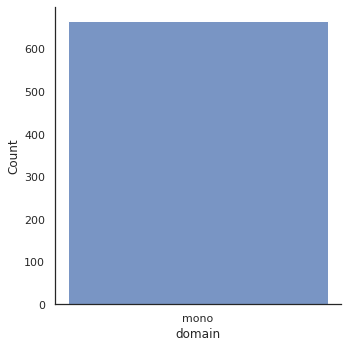

In [6]:
sns.set_context("talk")
sns.set_theme(style="white")
sns.displot(data = summary, x = "domain" ) 